https://efotw.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown

!pip install openpyxl

!wget https://efotw.org/sites/all/modules/custom/ftw_maps_pages/files/efotw-2024-master-index-data-for-researchers-iso.xlsx

In [2]:
xl_file = pd.ExcelFile("efotw-2024-master-index-data-for-researchers-iso.xlsx")

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [3]:
len(dfs)

3

In [4]:
dfs.keys()

dict_keys(['EFW Data 2024 Report', 'EFW Panel Data 2024 Report', 'EFW Data 1950-1965'])

In [5]:
efw_data_2024 = dfs["EFW Data 2024 Report"]
efw_data_2024 = efw_data_2024.iloc[3:]
efw_data_2024.columns = efw_data_2024.iloc[0]
efw_data_2024 = efw_data_2024[1:]

In [6]:
efw_data_2024 = efw_data_2024.iloc[:, 1:]

In [7]:
efw_data_2024['Countries'].value_counts()

Countries
Albania          29
Algeria          29
Angola           29
Argentina        29
Armenia          29
                 ..
Venezuela, RB    29
Vietnam          29
Yemen, Rep.      29
Zambia           29
Zimbabwe         29
Name: count, Length: 165, dtype: int64

In [8]:
# Filter data for India
india_data = efw_data_2024[efw_data_2024['Countries'] == 'India']


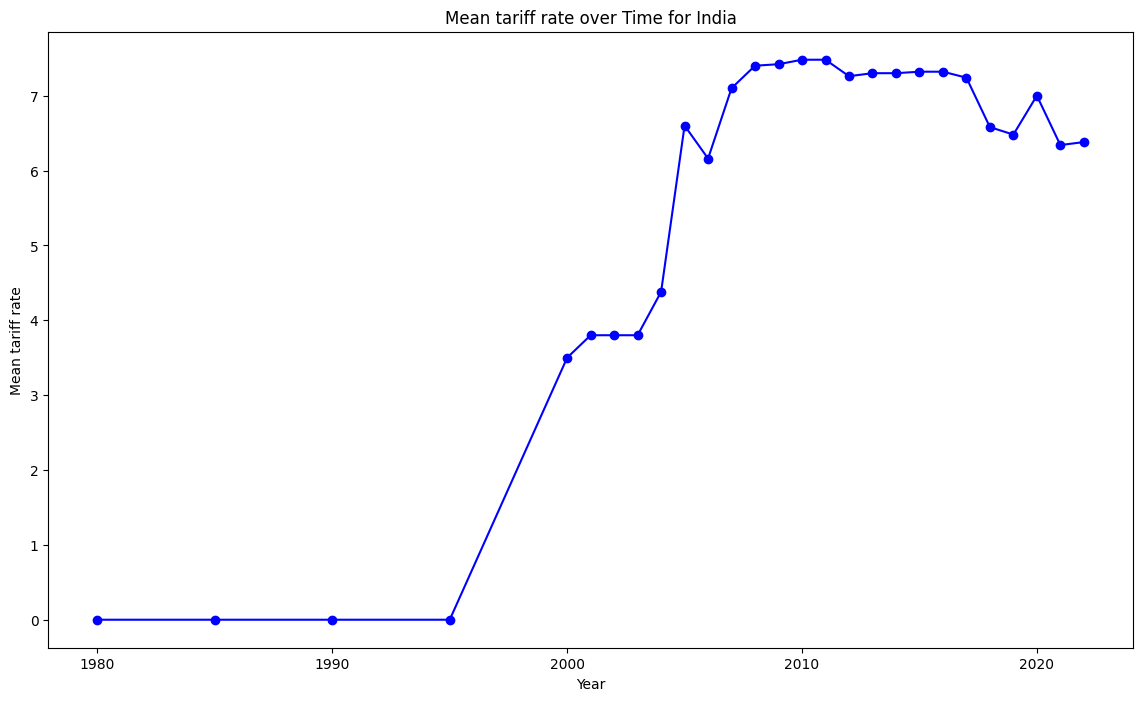

In [9]:


# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the time series data
plt.plot(india_data['Year'], india_data['Mean tariff rate'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Mean tariff rate over Time for India')
plt.xlabel('Year')
plt.ylabel('Mean tariff rate')

# Display the plot
plt.show()


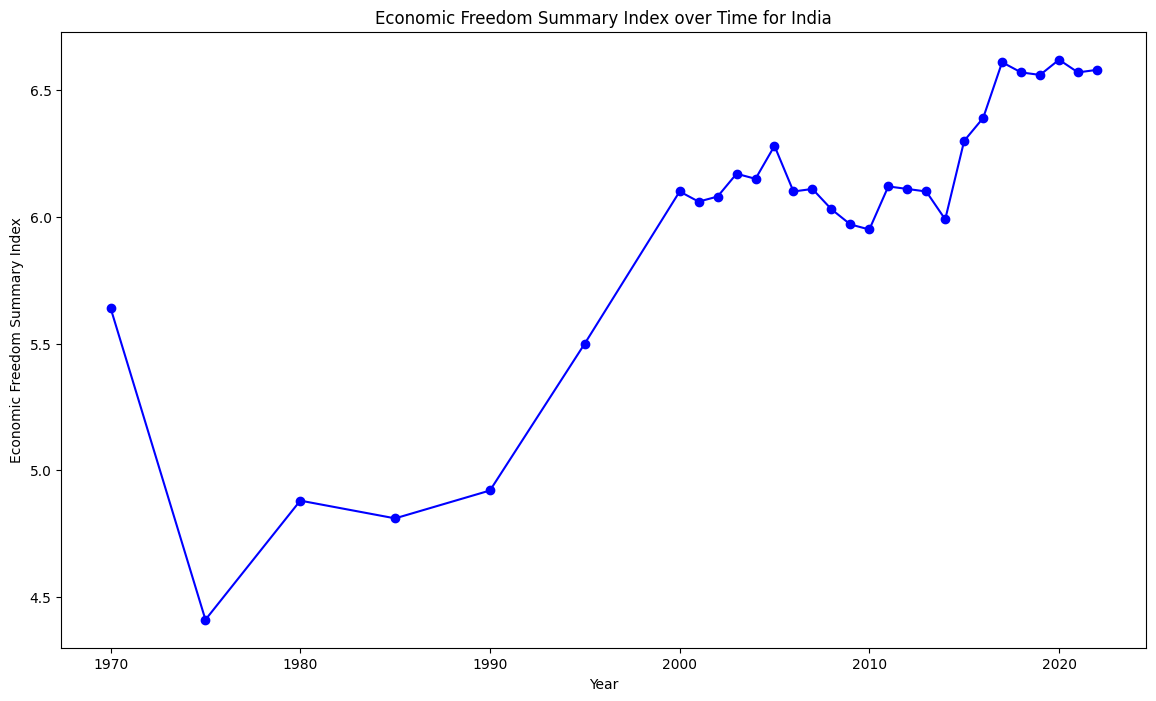

In [10]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the time series data
plt.plot(india_data['Year'], india_data[' Economic Freedom Summary Index'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Economic Freedom Summary Index over Time for India')
plt.xlabel('Year')
plt.ylabel('Economic Freedom Summary Index')

# Display the plot
plt.show()


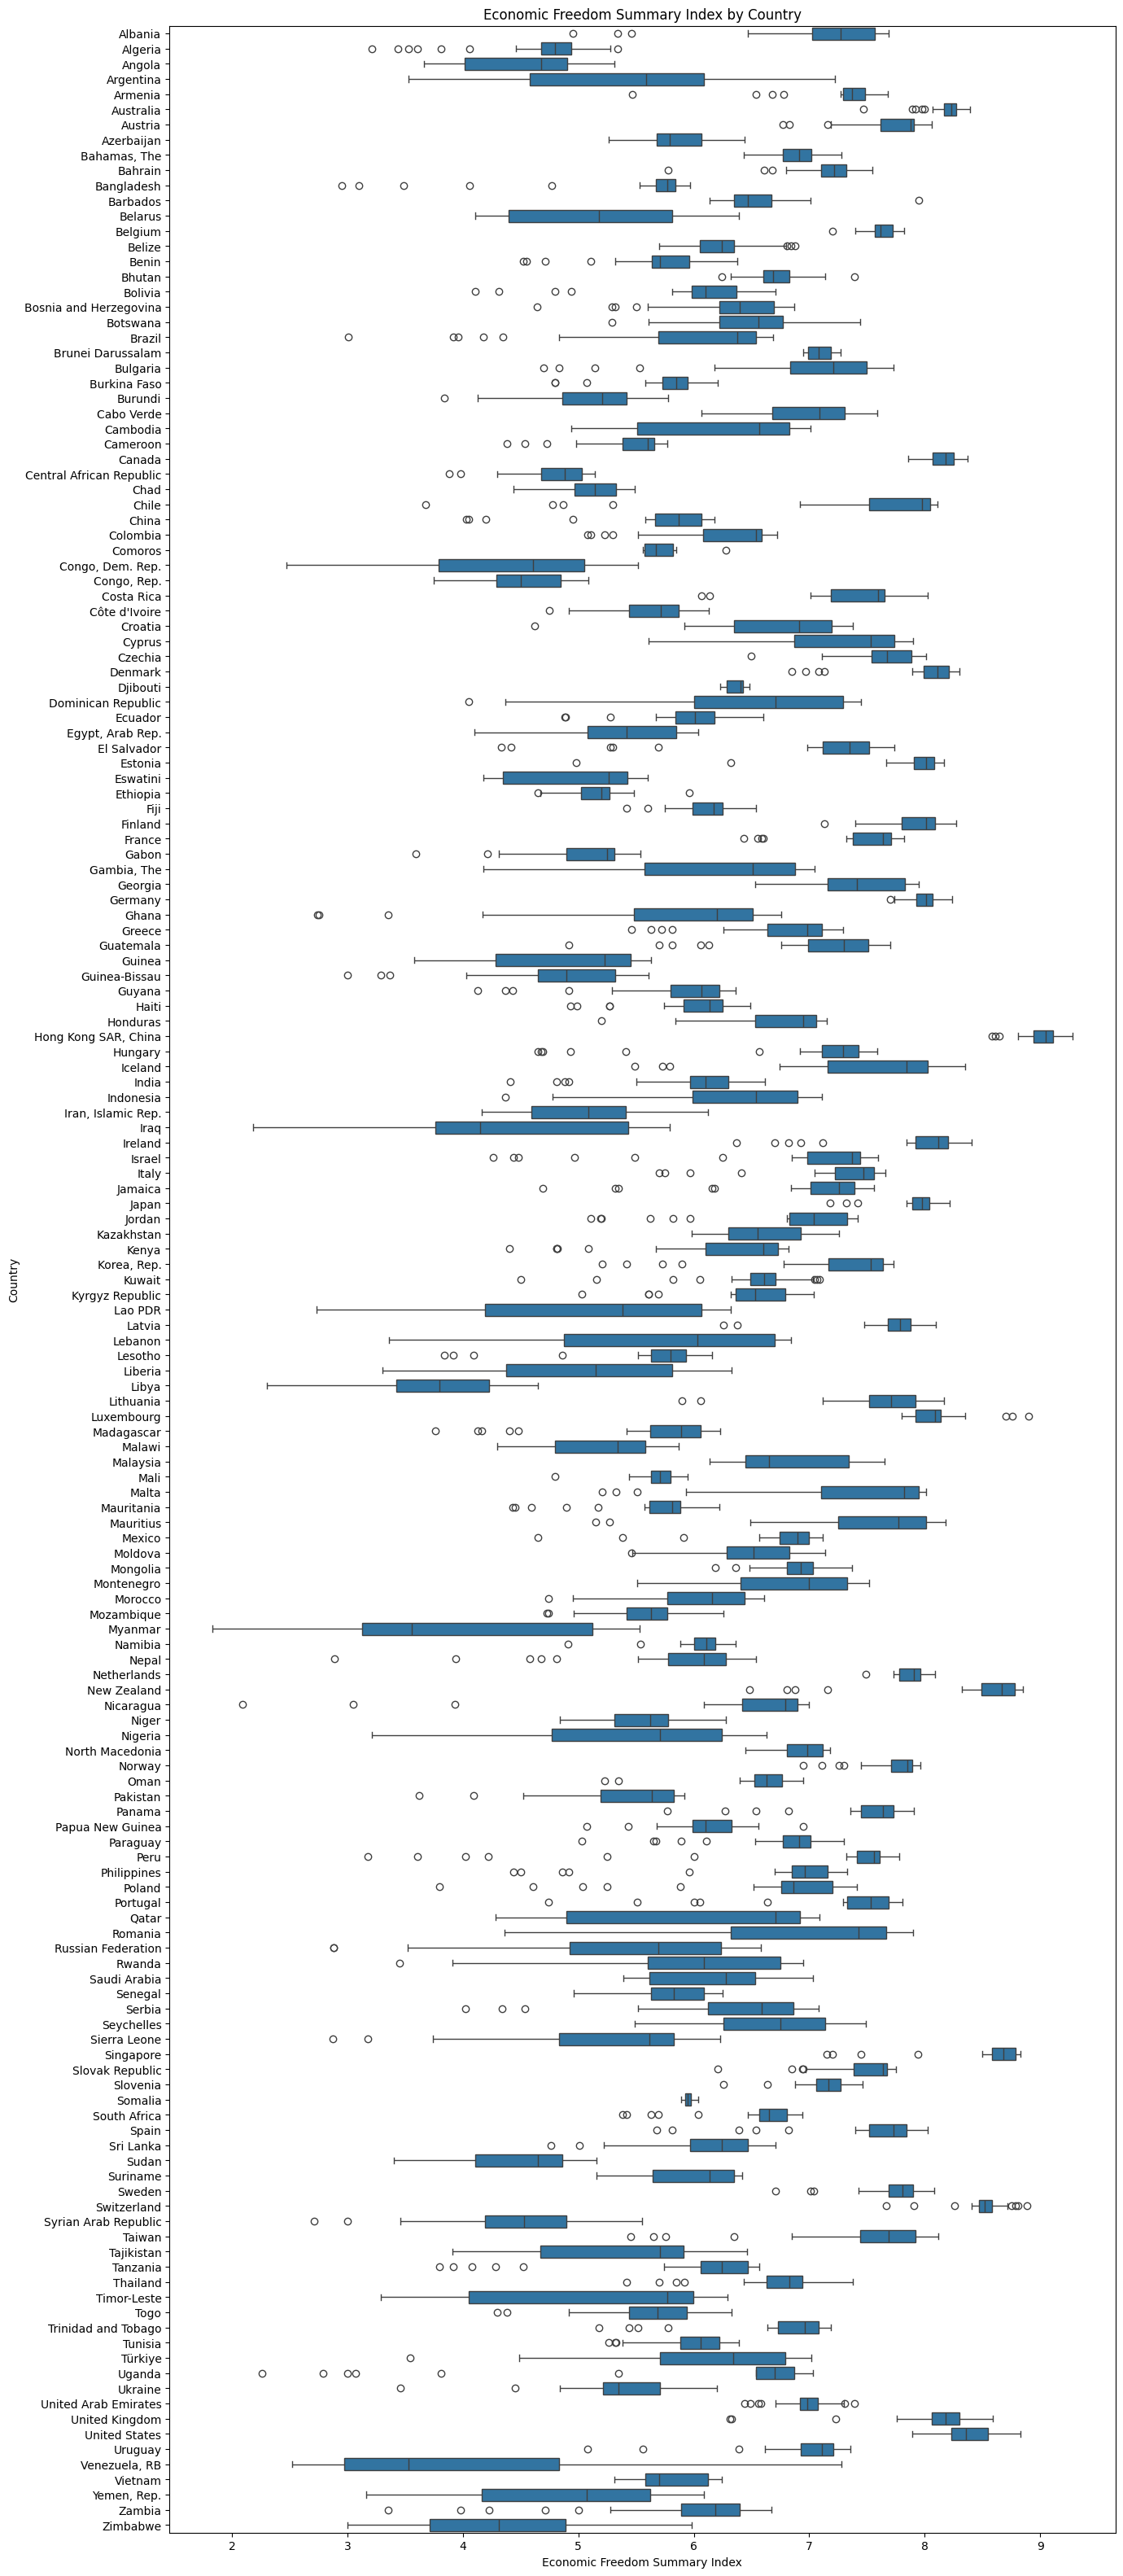

In [11]:

plt.figure(figsize=(15, 40))

# Plot the boxplot with Country on the y-axis
sns.boxplot(y='Countries', x=' Economic Freedom Summary Index', data=efw_data_2024)

# Adding titles and labels
plt.title('Economic Freedom Summary Index by Country')
plt.ylabel('Country')
plt.xlabel('Economic Freedom Summary Index')

# Display the plot
plt.show()

In [12]:
efw_data_2024['World Bank Region'].value_counts()


World Bank Region
Europe & Central Asia            1363
Sub-Saharan Africa               1276
Latin America & the Caribbean     754
East Asia & Pacific               609
Middle East & North Africa        551
South Asia                        174
North America                      58
Name: count, dtype: int64

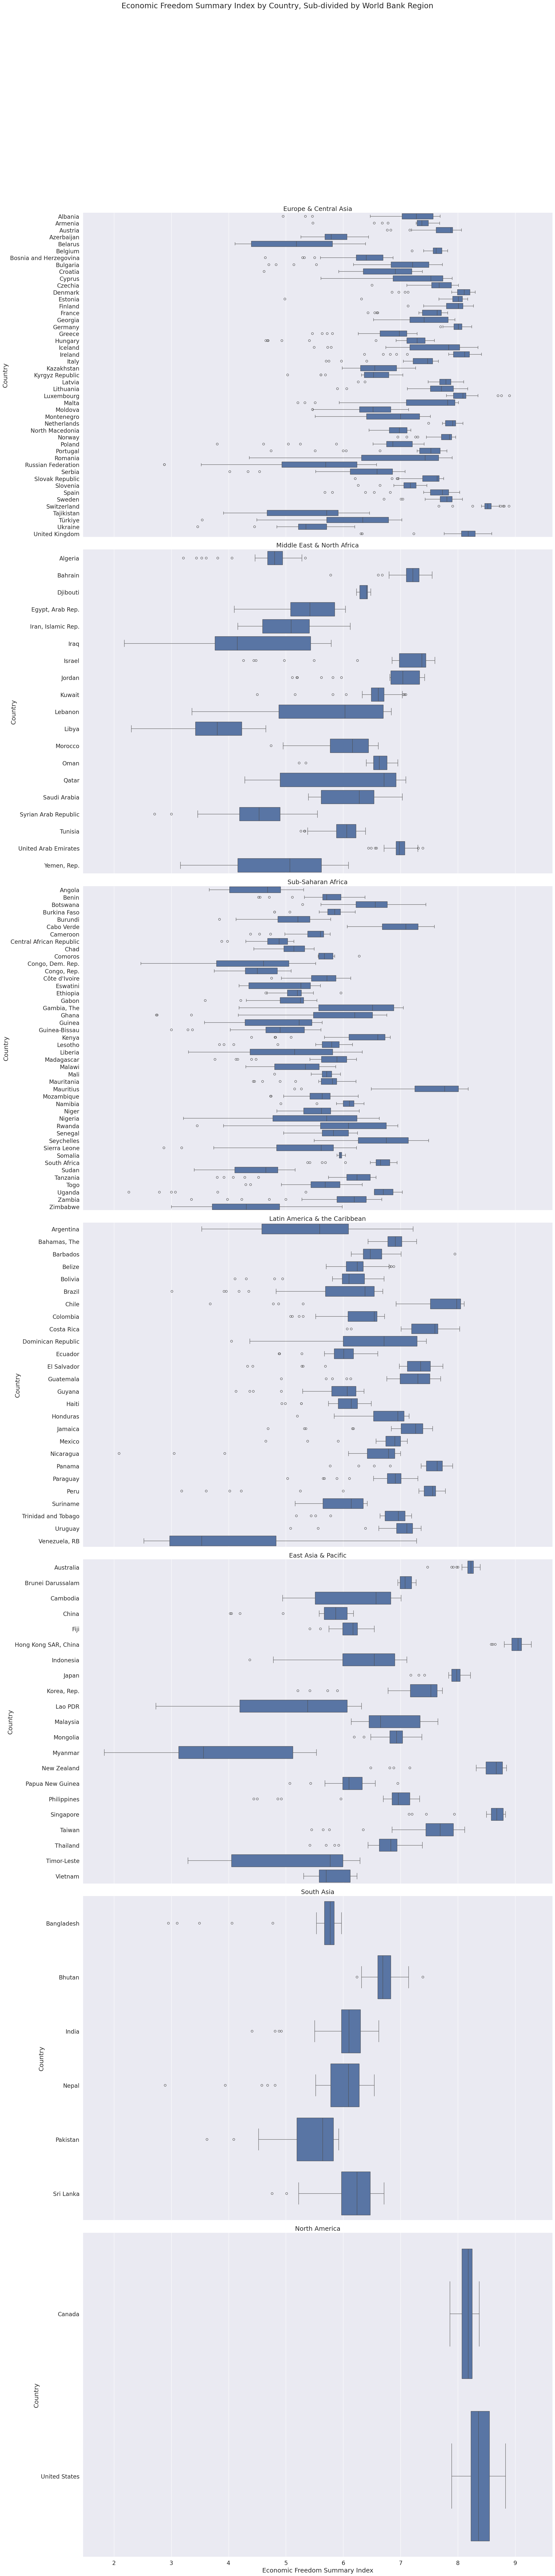

In [13]:
# Create a FacetGrid to sub-divide plots by World Bank Region
sns.set(font_scale=1.5)
g = sns.FacetGrid(efw_data_2024, col='World Bank Region', col_wrap=1, height=15, aspect=1.5, sharey=False)

# Define a function to plot the boxplot for each region
def plot_region(data, **kwargs):
    sns.boxplot(y='Countries', x=' Economic Freedom Summary Index', data=data, **kwargs)

# Map the boxplot onto the FacetGrid
g.map_dataframe(plot_region)

# Adding titles and labels
g.set_titles("{col_name}")
g.set_axis_labels('Economic Freedom Summary Index', 'Country')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Economic Freedom Summary Index by Country, Sub-divided by World Bank Region')

# Display the plots
plt.show()


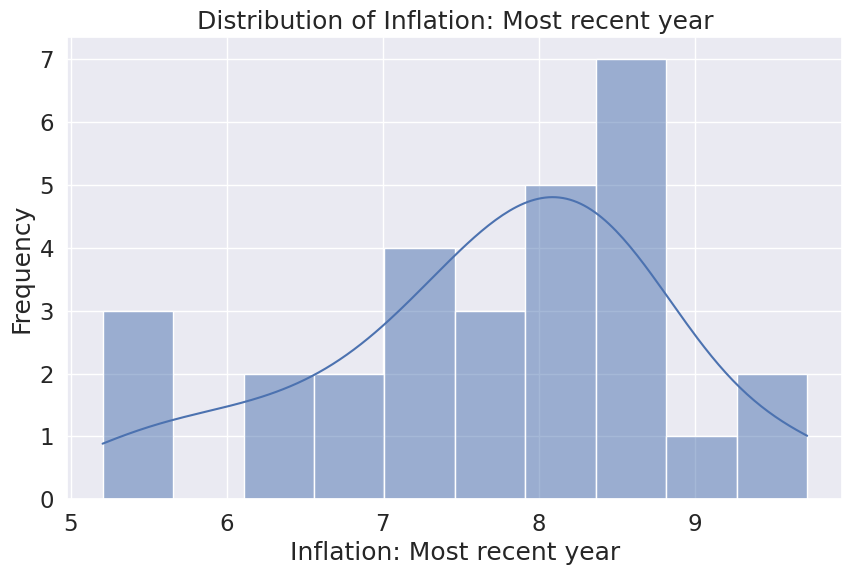

In [14]:

# Distribution of Data Values
plt.figure(figsize=(10, 6))
sns.histplot(india_data['Inflation: Most recent year'], bins=10, kde=True)
plt.title('Distribution of Inflation: Most recent year')
plt.xlabel('Inflation: Most recent year')
plt.ylabel('Frequency')
plt.show()




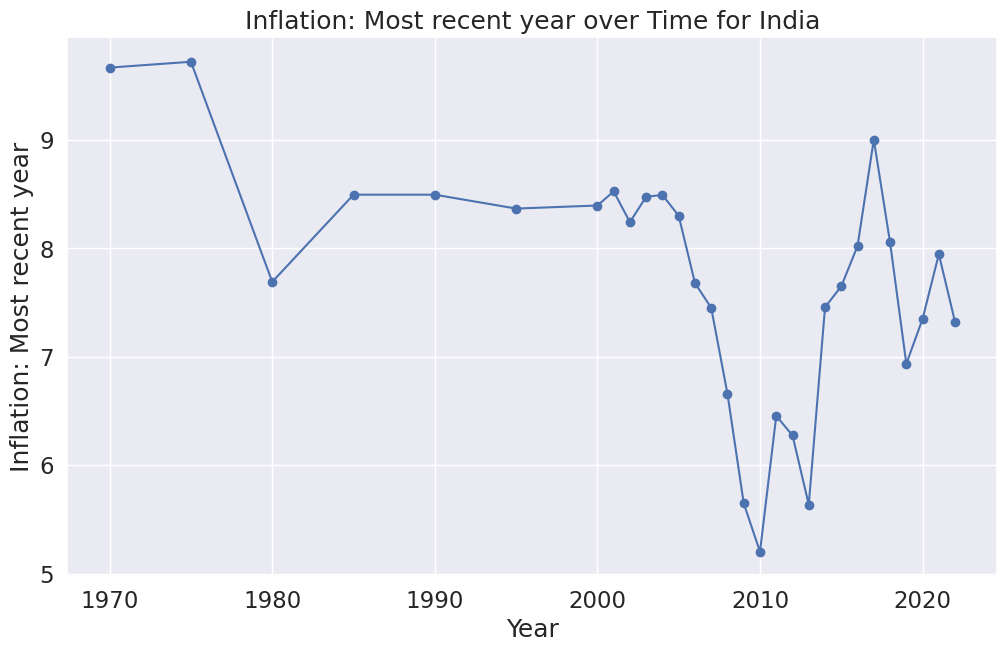

In [15]:
# Set the figure size
plt.figure(figsize=(12, 7))

# Plot the time series data
plt.plot(india_data['Year'], india_data['Inflation: Most recent year'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Inflation: Most recent year over Time for India')
plt.xlabel('Year')
plt.ylabel('Inflation: Most recent year')

# Display the plot
plt.show()

In [16]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation
efw_data_2024.groupby(['Year'])['Top marginal tax rate'].agg(['min', 'max', 'mean', 'std'])

,min,max,mean,std
Year,,,,
1970,0.0,10,2.0,3.240370
1975,0.0,10,3.558824,3.220190
1980,0.0,10,2.649351,2.945855
1985,0.0,10,2.767442,2.937283
1990,0.0,10,4.076923,2.960784
1995,0.0,10,5.277778,2.726684
2000,0.0,10,5.561905,2.601493
2001,0.0,10,5.657143,2.588170
2002,0.0,10,5.747664,2.554476


In [17]:
efw_data_2024.groupby('World Bank Region')[['Top marginal tax rate', ' Economic Freedom Summary Index' ]].agg([np.min, np.max, np.mean, np.median])

/tmp/ipykernel_81/801442802.py:1: FutureWarning: The provided callable <function min at 0x76cddc27f250> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  efw_data_2024.groupby('World Bank Region')[['Top marginal tax rate', ' Economic Freedom Summary Index' ]].agg([np.min, np.max, np.mean, np.median])
/tmp/ipykernel_81/801442802.py:1: FutureWarning: The provided callable <function max at 0x76cddc27f130> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  efw_data_2024.groupby('World Bank Region')[['Top marginal tax rate', ' Economic Freedom Summary Index' ]].agg([np.min, np.max, np.mean, np.median])
/tmp/ipykernel_81/801442802.py:1: FutureWarning: The provided callable <function mean at 0x76cddc27fa30> is currently using SeriesGroupBy.mean. In a fut

3                             Top marginal tax rate                       \
                                                min max      mean median   
World Bank Region                                                          
East Asia & Pacific                               0  10  6.666667    7.0   
Europe & Central Asia                             0  10  4.978125    5.0   
Latin America & the Caribbean                     0  10  6.778917    7.0   
Middle East & North Africa                        0  10  7.588315    8.5   
North America                                     0   8   5.12069    5.0   
South Asia                                        0  10  7.102273    8.0   
Sub-Saharan Africa                                0  10  5.488184    6.0   

3                              Economic Freedom Summary Index                  \
                                                          min   max      mean   
World Bank Region                                                               
East Asia & Pacific                                      1.83  9.28  6.766061   
Europe & Central Asia                                    2.88   8.9  7.140153   
Latin America & the Caribbean                            2.09  8.11  6.474783   
Middle East & North Africa                               2.18   7.6  5.786529   
North America                                            7.86  8.83  8.277931   
South Asia                                               2.89  7.39   5.88012   
Sub-Saharan Africa                                       2.26  8.18  5.546365   

3                                     
                              median  
World Bank Region                     
East Asia & Pacific             6.85  
Europe & Central Asia           7.43  
Latin America & the Caribbean  6.645  
Middle East & North Africa      5.97  
North America                   8.25  
South Asia                      6.02  
Sub-Saharan Africa              5.62

In [ ]:
efw_data_2024.groupby('World Bank Region')['Top marginal tax rate'].agg(np.median).plot(kind='

In [18]:
efw_data_2024.pivot_table(values=' Economic Freedom Summary Index', index='World Bank Region', aggfunc = ["median", "mean", "std"] )

,median,mean,std
3,Economic Freedom Summary Index,Economic Freedom Summary Index,Economic Freedom Summary Index
World Bank Region,,,
East Asia & Pacific,6.85,6.766061,1.410446
Europe & Central Asia,7.43,7.140153,0.983744
Latin America & the Caribbean,6.645,6.474783,1.043541
Middle East & North Africa,5.97,5.786529,1.194003
North America,8.25,8.277931,0.228387
South Asia,6.02,5.88012,0.770373
Sub-Saharan Africa,5.62,5.546365,0.949008


In [19]:
efw_data_2024.pivot_table(values=' Economic Freedom Summary Index', index='Year', columns="World Bank Region", aggfunc = "median", margins = True )

World Bank Region,East Asia & Pacific,Europe & Central Asia,Latin America & the Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,All
Year,,,,,,,,
1970,6.565,6.725,6.07,5.19,7.995,4.775,5.1,5.81
1975,5.65,6.34,5.28,5.135,7.985,3.94,4.48,5.27
1980,5.76,6.59,5.25,4.62,8.25,4.68,4.4,5.21
1985,6.19,6.43,5.18,5.17,8.375,4.58,4.83,5.35
1990,6.78,6.935,5.725,5.355,8.49,4.81,5.06,5.63
1995,7.17,7.07,6.71,5.86,8.475,5.5,5.02,6.31
2000,6.36,7.015,6.61,5.87,8.6,5.98,5.375,6.16
2001,6.25,7.075,6.67,5.9,8.44,6.035,5.23,6.18
2002,6.485,7.11,6.77,5.63,8.445,6.065,5.355,6.22


In [20]:
efw_data_2024.loc[efw_data_2024['Year']>2018, :].set_index(['Year','World Bank Region']).head()

#.pivot_table(values=' Economic Freedom Summary Index', index='Year', columns="World Bank Region", aggfunc = "median", margins = True )

3                                  ISO Code 2 ISO Code 3  Countries  \
Year World Bank Region                                                
2022 Europe & Central Asia                 AL        ALB    Albania   
     Middle East & North Africa            DZ        DZA    Algeria   
     Sub-Saharan Africa                    AO        AGO     Angola   
     Latin America & the Caribbean         AR        ARG  Argentina   
     Europe & Central Asia                 AM        ARM    Armenia   

3                                   Economic Freedom Summary Index Rank  \
Year World Bank Region                                                    
2022 Europe & Central Asia                                    7.48   38   
     Middle East & North Africa                               4.46  161   
     Sub-Saharan Africa                                       4.79  155   
     Latin America & the Caribbean                            4.55  159   
     Europe & Central Asia                                    7.49   36   

3                                  Quartile Government consumption   data  \
Year World Bank Region                                                      
2022 Europe & Central Asia                1               8.282353  11.84   
     Middle East & North Africa           4               3.491176  28.13   
     Sub-Saharan Africa                   4               7.944118  12.99   
     Latin America & the Caribbean        4               6.167647  19.03   
     Europe & Central Asia                1               7.058824     16   

3                                  Transfers and subsidies      data  ...  \
Year World Bank Region                                                ...   
2022 Europe & Central Asia                        7.133515     11.02  ...   
     Middle East & North Africa                   7.817129  8.511137  ...   
     Sub-Saharan Africa                           9.702997      1.59  ...   
     Latin America & the Caribbean                5.536785     16.88  ...   
     Europe & Central Asia                        7.882834      8.27  ...   

3                                  Impartial Public Administration  \
Year World Bank Region                                               
2022 Europe & Central Asia                                  6.0575   
     Middle East & North Africa                               2.61   
     Sub-Saharan Africa                                     4.8625   
     Latin America & the Caribbean                          7.5475   
     Europe & Central Asia                                    6.41   

3                                  Tax compliance Business regulations  \
Year World Bank Region                                                   
2022 Europe & Central Asia               3.587625             5.379721   
     Middle East & North Africa          4.764764             3.841924   
     Sub-Saharan Africa                  4.641462             4.443797   
     Latin America & the Caribbean       4.504147             4.969248   
     Europe & Central Asia               6.020369              5.56686   

3                                  Market openness Business Permits  \
Year World Bank Region                                                
2022 Europe & Central Asia                6.810619          5.62194   
     Middle East & North Africa           4.641448         8.771111   
     Sub-Saharan Africa                   3.427185         7.916416   
     Latin America & the Caribbean        6.144822         5.726521   
     Europe & Central Asia                5.590883         9.302574   

3                                  Distorton of the business environment  \
Year World Bank Region                                                     
2022 Europe & Central Asia                                          6.25   
     Middle East & North Africa                                 2.583207   
     Sub-Saharan Africa                                             1.25   
     Lat

In [21]:
efw_data_2024.loc[efw_data_2024['Rank']==1].sort_values('Year', ascending=False)

3,Year,ISO Code 2,ISO Code 3,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,data,Transfers and subsidies,...,Tax compliance,Business regulations,Market openness,Business Permits,Distorton of the business environment,Freedom to enter markets and compete,Regulation,Area 5 Rank,World Bank Region,"World Bank Current Income Classification, 1990-Present"
70,2022,HK,HKG,"Hong Kong SAR, China",8.58,1,1,6.567647,17.67,9.002725,...,9.806639,6.990462,9.452994,9.793808,8.932626,9.393143,8.855034,1,East Asia & Pacific,H
235,2021,HK,HKG,"Hong Kong SAR, China",8.61,1,1,7.0,16.2,9.002725,...,9.806639,7.157129,9.713884,9.793808,9.454406,9.654033,8.981496,1,East Asia & Pacific,H
400,2020,HK,HKG,"Hong Kong SAR, China",8.65,1,1,7.029412,16.1,8.814714,...,9.806639,7.761434,9.986681,9.793808,10,9.92683,8.937197,1,East Asia & Pacific,H
565,2019,HK,HKG,"Hong Kong SAR, China",8.92,1,1,7.773529,13.57,9.13624,...,9.806639,8.051156,9.986681,9.793808,10,9.92683,9.294881,1,East Asia & Pacific,H
730,2018,HK,HKG,"Hong Kong SAR, China",9.05,1,1,8.047059,12.64,9.286104,...,9.806639,8.547893,9.986681,9.793808,10,9.92683,9.419065,1,East Asia & Pacific,H
895,2017,HK,HKG,"Hong Kong SAR, China",9.05,1,1,7.994118,12.82,9.422343,...,9.806639,8.417719,9.985105,9.744323,10,9.909809,9.383119,1,East Asia & Pacific,H
1060,2016,HK,HKG,"Hong Kong SAR, China",9.02,1,1,7.917647,13.08,9.359673,...,9.596464,8.473937,9.985105,9.744142,10,9.909749,9.39874,1,East Asia & Pacific,H
1225,2015,HK,HKG,"Hong Kong SAR, China",9.02,1,1,8.026471,12.71,9.332425,...,9.585255,8.50553,9.986418,9.744142,10,9.910187,9.401528,1,East Asia & Pacific,H
1390,2014,HK,HKG,"Hong Kong SAR, China",9.02,1,1,8.076471,12.54,9.436172,...,9.585255,8.48678,9.984842,9.744142,10,9.909661,9.405917,1,East Asia & Pacific,H
1555,2013,HK,HKG,"Hong Kong SAR, China",9.02,1,1,8.135294,12.34,9.168103,...,9.562836,8.491722,9.976313,9.84257,10,9.939628,9.399569,1,East Asia & Pacific,H


In [22]:
efw_data_2024.groupby(['Year', 'World Bank Region'])['Top marginal tax rate'].agg(['min', 'max', 'mean', 'std'])

min   max      mean       std
Year World Bank Region                                           
1970 East Asia & Pacific            4.0  10.0       7.0  4.242641
     Europe & Central Asia          0.0   3.0  1.666667  1.527525
     Latin America & the Caribbean  0.0   7.0       3.5  4.949747
     Middle East & North Africa     NaN   NaN       NaN       NaN
     North America                  0.0   0.0       0.0  0.000000
...                                 ...   ...       ...       ...
2022 Latin America & the Caribbean  4.0  10.0  6.826923  1.777314
     Middle East & North Africa     3.5  10.0  7.842105  2.291607
     North America                  5.0   5.0       5.0  0.000000
     South Asia                     5.0  10.0  7.583333  1.744037
     Sub-Saharan Africa             2.0   9.5     6.125  1.926332

[203 rows x 4 columns]

In [23]:
efw_data_2024.groupby(['Year'])['Top marginal tax rate'].mean()

Year
1970         2.0
1975    3.558824
1980    2.649351
1985    2.767442
1990    4.076923
1995    5.277778
2000    5.561905
2001    5.657143
2002    5.747664
2003    5.801802
2004    5.929825
2005    6.086777
2006     6.03629
2007    6.181452
2008    6.224409
2009    6.253906
2010    6.507353
2011    6.509804
2012    6.434641
2013    6.541401
2014    6.525157
2015    6.462264
2016    6.503086
2017    6.478395
2018    6.490741
2019    6.518182
2020    6.524242
2021    6.484848
2022     6.49697
Name: Top marginal tax rate, dtype: object

In [24]:
efw_data_2024.groupby(['Year', 'World Bank Region'])['Top marginal tax rate'].mean()

Year  World Bank Region            
1970  East Asia & Pacific                   7.0
      Europe & Central Asia            1.666667
      Latin America & the Caribbean         3.5
      Middle East & North Africa            NaN
      North America                         0.0
                                         ...   
2022  Latin America & the Caribbean    6.826923
      Middle East & North Africa       7.842105
      North America                         5.0
      South Asia                       7.583333
      Sub-Saharan Africa                  6.125
Name: Top marginal tax rate, Length: 203, dtype: object

In [25]:
efw_data_2024[['Top marginal tax rate', 'Government investment', 'Freedom to enter markets and compete','Inflation: Most recent year', 'Financial openness', ' Economic Freedom Summary Index']].corr()

3,Top marginal tax rate,Government investment,Freedom to enter markets and compete,Inflation: Most recent year,Financial openness,Economic Freedom Summary Index
3,,,,,,
Top marginal tax rate,1.000000,-0.144789,-0.071601,-0.034389,0.060985,0.116580
Government investment,-0.144789,1.000000,0.376436,0.101304,0.337331,0.521389
Freedom to enter markets and compete,-0.071601,0.376436,1.000000,0.405267,0.604582,0.807165
Inflation: Most recent year,-0.034389,0.101304,0.405267,1.000000,0.334448,0.508698
Financial openness,0.060985,0.337331,0.604582,0.334448,1.000000,0.736384
Economic Freedom Summary Index,0.116580,0.521389,0.807165,0.508698,0.736384,1.000000


In [26]:
efw_data_2024.set_index('World Bank Region', inplace =True)
efw_data_2024.loc['South Asia',   'Countries': 'Quartile'].head()     


3,Countries,Economic Freedom Summary Index,Rank,Quartile
World Bank Region,,,,
South Asia,Bangladesh,5.85,127,4
South Asia,Bhutan,6.24,98,3
South Asia,India,6.58,84,3
South Asia,Nepal,6.54,86,3
South Asia,Pakistan,5.62,134,4


In [27]:
efw_data_2024.reset_index(inplace =True)

In [28]:
efw_data_2024.set_index(['World Bank Region', 'Year'], inplace =True)
   

In [29]:
efw_data_2024.loc[:, 'Countries': 'Quartile'].head()

,3,Countries,Economic Freedom Summary Index,Rank,Quartile
World Bank Region,Year,,,,
Europe & Central Asia,2022,Albania,7.48,38,1
Middle East & North Africa,2022,Algeria,4.46,161,4
Sub-Saharan Africa,2022,Angola,4.79,155,4
Latin America & the Caribbean,2022,Argentina,4.55,159,4
Europe & Central Asia,2022,Armenia,7.49,36,1


In [30]:
efw_data_2024.loc[('Europe & Central Asia', 2022), 'Countries': 'Quartile'].head()

/tmp/ipykernel_81/1699246656.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  efw_data_2024.loc[('Europe & Central Asia', 2022), 'Countries': 'Quartile'].head()


3                            Countries  Economic Freedom Summary Index Rank  \
World Bank Region     Year                                                    
Europe & Central Asia 2022     Albania                            7.48   38   
                      2022     Armenia                            7.49   36   
                      2022     Austria                            7.62   23   
                      2022  Azerbaijan                             5.8  128   
                      2022     Belarus                            5.98  112   

3                          Quartile  
World Bank Region     Year           
Europe & Central Asia 2022        1  
                      2022        1  
                      2022        1  
                      2022        4  
                      2022        3

In [31]:
efw_data_2024= efw_data_2024.sort_index()

In [32]:
# efw_data_2024.loc[('Europe & Central Asia', 2021), ('Europe & Central Asia', 2022), 'Countries': 'Quartile'].head()

In [33]:
efw_data_2024.reset_index(inplace =True)

In [34]:
india_data.columns

Index(['Year', 'ISO Code 2', 'ISO Code 3', 'Countries',
       ' Economic Freedom Summary Index', 'Rank', 'Quartile',
       'Government consumption', 'data', 'Transfers and subsidies', 'data',
       'Government investment', 'data', 'Top marginal income tax rate', 'data',
       'Top marginal income and payroll tax rate', 'data',
       'Top marginal tax rate', 'State ownership of Assets',
       'Size of Government', 'Area 1 Rank', 'Judicial independence',
       'Impartial courts', 'Protection of property rights',
       'Military interference in rule of law and politics',
       'Integrity of the legal system', 'Legal enforcement of contracts',
       'Regulatory restrictions on the sale of real property',
       'Reliability of police', 'Gender Legal Rights Adjustment',
       'Legal System & Property Rights -- Without Gender Adjustment',
       'Legal System & Property Rights -- With Gender Adjustment',
       'Area 2 Rank', 'Money growth', 'data',
       'Standard deviation of i